In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
 

In [2]:
thp_df = pd.read_csv("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /THP NMD Classification Model  copy.csv", encoding="utf-8")
# To display the top 5 rows
thp_df.head()


,Emancipation Age,Youth ID,Gender,Entry Date,DOB,Current Age,Proj. Emancipation Date,Exit Date,Parent,Permanency/Navigating Wellfare Sys,Daily Living,Self Care,Relationships & Communication,Housing & Money Management,Work & Study Life,Career & Education Planning,Looking Forward,Total,Catagorical,Result Score
0,21.0,1,1.0,16-Dec-2019,19-Jun-2001,18.0,19-Jun-2022,10-Sep-2020,0.0,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,Good,1.0
1,NaN,2,1.0,22-Nov-2020,9-Mar-2001,19.0,9-Mar-2022,9-Mar-2022,0.0,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,Good,1.0
2,NaN,3,1.0,18-Feb-2020,14-Feb-2002,18.0,14-Feb-2023,7-Apr-2020,0.0,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,Bad,0.0
3,NaN,4,1.0,7-Apr-2020,27-Nov-2001,18.0,27-Nov-2022,15-Oct-2022,0.0,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,Good,1.0
4,NaN,5,0.0,30-Jun-2020,11-Sep-2001,18.0,11-Sep-2022,1-Mar-2021,1.0,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,Bad,0.0


The Categorical Column and Result Score work together. Good = 1 and Bad = 0. Good/1 means the applicant left voluntarily from the program with no issues. Bad/0 means the applicant was removed from the program involuntarily; had issues or left on bad terms. Under Gender, 1=Male & 0=Female. 
Under parent, 1 = parent; 0 = not a parent.  

This model will attempt to perdict future applicants that will be either Good or Bad for the program.


In [7]:
thp_df.dtypes

Emancipation Age                      float64
Youth ID                               object
Gender                                float64
Entry Date                             object
DOB                                    object
Current Age                           float64
Proj. Emancipation Date                object
Exit Date                              object
Parent                                float64
Permanency/Navigating Wellfare Sys    float64
Daily Living                          float64
Self Care                             float64
Relationships & Communication         float64
Housing & Money Management            float64
Work & Study Life                     float64
Career & Education Planning           float64
Looking Forward                       float64
Total                                 float64
Catagorical                            object
Result Score                          float64
dtype: object

In [3]:
thp_df.columns

Index(['Emancipation Age', 'Youth ID', 'Gender', 'Entry Date', 'DOB',
       'Current Age', 'Proj. Emancipation Date ', 'Exit Date ', 'Parent',
       'Permanency/Navigating Wellfare Sys', 'Daily Living ', 'Self Care',
       'Relationships & Communication', 'Housing & Money Management ',
       'Work & Study Life ', 'Career & Education Planning', 'Looking Forward',
       'Total', 'Catagorical ', 'Result Score '],
      dtype='object')

In [4]:
 # Lets take a subset of our dataframe keeping only the features we want .
thp_df = thp_df[['Youth ID','Entry Date', 'Gender', 'Current Age', 'Parent',
       'Permanency/Navigating Wellfare Sys', 'Daily Living ', 'Self Care',
       'Relationships & Communication', 'Housing & Money Management ',
       'Work & Study Life ', 'Career & Education Planning', 'Looking Forward',
       'Total','Catagorical ','Result Score ']]
# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
thp_df['Entry_date'] = pd.to_datetime(thp_df['Entry Date']).dt.date
 
thp_df.head()


,Youth ID,Entry Date,Gender,Current Age,Parent,Permanency/Navigating Wellfare Sys,Daily Living,Self Care,Relationships & Communication,Housing & Money Management,Work & Study Life,Career & Education Planning,Looking Forward,Total,Catagorical,Result Score,Entry_date
0,1,16-Dec-2019,1.0,18.0,0.0,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,Good,1.0,2019-12-16
1,2,22-Nov-2020,1.0,19.0,0.0,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,Good,1.0,2020-11-22
2,3,18-Feb-2020,1.0,18.0,0.0,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,Bad,0.0,2020-02-18
3,4,7-Apr-2020,1.0,18.0,0.0,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,Good,1.0,2020-04-07
4,5,30-Jun-2020,0.0,18.0,1.0,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,Bad,0.0,2020-06-30


In [5]:
#reorder columns in df
thp_df1 = thp_df.reindex(['Youth ID','Gender','Entry_date','Current Age','Parent',
       'Permanency/Navigating Wellfare Sys', 'Daily Living ', 'Self Care',
       'Relationships & Communication', 'Housing & Money Management ',
       'Work & Study Life ', 'Career & Education Planning', 'Looking Forward',
       'Total','Catagorical ','Result Score '], axis=1)
thp_df1.head()

,Youth ID,Gender,Entry_date,Current Age,Parent,Permanency/Navigating Wellfare Sys,Daily Living,Self Care,Relationships & Communication,Housing & Money Management,Work & Study Life,Career & Education Planning,Looking Forward,Total,Catagorical,Result Score
0,1,1.0,2019-12-16,18.0,0.0,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,Good,1.0
1,2,1.0,2020-11-22,19.0,0.0,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,Good,1.0
2,3,1.0,2020-02-18,18.0,0.0,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,Bad,0.0
3,4,1.0,2020-04-07,18.0,0.0,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,Good,1.0
4,5,0.0,2020-06-30,18.0,1.0,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,Bad,0.0


In [6]:
#Renaming the column names
thp_df1 = thp_df1.rename(columns={'Gender':'Sex',"Permanency/Navigating Wellfare Sys": "PN", 'Daily Living ': "DL" , "Self Care":"SC", "Relationships & Communication" : "RC", 
                                  'Housing & Money Management ':"H&M", 'Work & Study Life ': "W&S", 
                                  "Career & Education Planning": "C&EP", "Looking Forward": "LF", 'Result Score ': "Class"})
thp_df1.head()

,Youth ID,Sex,Entry_date,Current Age,Parent,PN,DL,SC,RC,H&M,W&S,C&EP,LF,Total,Catagorical,Class
0,1,1.0,2019-12-16,18.0,0.0,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,Good,1.0
1,2,1.0,2020-11-22,19.0,0.0,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,Good,1.0
2,3,1.0,2020-02-18,18.0,0.0,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,Bad,0.0
3,4,1.0,2020-04-07,18.0,0.0,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,Good,1.0
4,5,0.0,2020-06-30,18.0,1.0,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,Bad,0.0


In [7]:
# Dropping the missing values. df.count()
thp_df1 = thp_df1.dropna()
thp_df1.count()   

Youth ID        20
Sex             20
Entry_date      20
Current Age     20
Parent          20
PN              20
DL              20
SC              20
RC              20
H&M             20
W&S             20
C&EP            20
LF              20
Total           20
Catagorical     20
Class           20
dtype: int64

In [8]:
#After Dropping the Values 
print(thp_df1.isnull().sum())

Youth ID        0
Sex             0
Entry_date      0
Current Age     0
Parent          0
PN              0
DL              0
SC              0
RC              0
H&M             0
W&S             0
C&EP            0
LF              0
Total           0
Catagorical     0
Class           0
dtype: int64


In [9]:
thp_df1.columns

Index(['Youth ID', 'Sex', 'Entry_date', 'Current Age', 'Parent', 'PN', 'DL',
       'SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF', 'Total', 'Catagorical ',
       'Class'],
      dtype='object')

In [10]:
#Adding Statistical measure columns to df
thp_df1['median'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].median(axis=1)
thp_df1['mean'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].mean(axis=1)
thp_df1['std'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].std(axis=1)
thp_df1['var'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].var(axis=1)
thp_df1['max'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].max(axis=1)
thp_df1['min'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].min(axis=1)
thp_df1['sum'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].sum(axis=1)
thp_df1['quantile'] = thp_df1[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF']].quantile(axis=1)

thp_df1.head()

,Youth ID,Sex,Entry_date,Current Age,Parent,PN,DL,SC,RC,H&M,...,Catagorical,Class,median,mean,std,var,max,min,sum,quantile
0,1,1.0,2019-12-16,18.0,0.0,3.80,4.47,4.41,4.33,3.96,...,Good,1.0,4.370,4.38375,0.442620,0.195913,5.00,3.80,35.07,4.370
1,2,1.0,2020-11-22,19.0,0.0,4.00,4.41,4.53,4.78,3.70,...,Good,1.0,4.250,4.24000,0.349816,0.122371,4.78,3.70,33.92,4.250
2,3,1.0,2020-02-18,18.0,0.0,4.30,4.65,4.29,4.78,3.78,...,Bad,0.0,4.400,4.37625,0.325793,0.106141,4.78,3.78,35.01,4.400
3,4,1.0,2020-04-07,18.0,0.0,3.55,2.24,2.71,3.83,2.09,...,Good,1.0,2.705,2.81000,0.669435,0.448143,3.83,2.09,22.48,2.705
4,5,0.0,2020-06-30,18.0,1.0,4.90,4.71,4.76,4.83,3.35,...,Bad,0.0,4.770,4.62250,0.525622,0.276279,5.00,3.35,36.98,4.770


In [11]:
thp_df1.tail()


,Youth ID,Sex,Entry_date,Current Age,Parent,PN,DL,SC,RC,H&M,...,Catagorical,Class,median,mean,std,var,max,min,sum,quantile
15,16,0.0,2019-06-13,18.0,0.0,4.95,5.00,4.94,4.94,4.91,...,Good,1.0,4.975,4.96750,0.036547,0.001336,5.0,4.91,39.74,4.975
16,17,1.0,2022-03-08,20.0,0.0,3.60,4.65,3.94,4.22,3.57,...,Good,1.0,4.020,3.99875,0.568392,0.323070,4.8,3.11,31.99,4.020
17,18,1.0,2022-07-26,18.0,0.0,5.00,5.00,5.00,5.00,5.00,...,Bad,0.0,5.000,5.00000,0.000000,0.000000,5.0,5.00,40.00,5.000
18,19,0.0,2022-05-26,19.0,0.0,3.40,4.72,4.78,5.00,4.10,...,Good,1.0,4.640,4.34000,0.622438,0.387429,5.0,3.40,34.72,4.640
19,20,1.0,2020-06-11,18.0,0.0,5.00,5.00,5.00,5.00,5.00,...,Bad,0.0,5.000,5.00000,0.000000,0.000000,5.0,5.00,40.00,5.000


In [12]:
thp_df1.columns

Index(['Youth ID', 'Sex', 'Entry_date', 'Current Age', 'Parent', 'PN', 'DL',
       'SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF', 'Total', 'Catagorical ',
       'Class', 'median', 'mean', 'std', 'var', 'max', 'min', 'sum',
       'quantile'],
      dtype='object')

In [13]:
#reorder columns in df again!
thp_re = thp_df1.reindex(['Youth ID', 'Sex', 'Entry_date', 'Current Age', 'Parent', 'PN', 'DL',
       'SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF', 'Total','median',
       'mean', 'std', 'var', 'max', 'min', 'sum', 'quantile','Catagorical ','Class'], axis=1)
thp_re.tail()

,Youth ID,Sex,Entry_date,Current Age,Parent,PN,DL,SC,RC,H&M,...,median,mean,std,var,max,min,sum,quantile,Catagorical,Class
15,16,0.0,2019-06-13,18.0,0.0,4.95,5.00,4.94,4.94,4.91,...,4.975,4.96750,0.036547,0.001336,5.0,4.91,39.74,4.975,Good,1.0
16,17,1.0,2022-03-08,20.0,0.0,3.60,4.65,3.94,4.22,3.57,...,4.020,3.99875,0.568392,0.323070,4.8,3.11,31.99,4.020,Good,1.0
17,18,1.0,2022-07-26,18.0,0.0,5.00,5.00,5.00,5.00,5.00,...,5.000,5.00000,0.000000,0.000000,5.0,5.00,40.00,5.000,Bad,0.0
18,19,0.0,2022-05-26,19.0,0.0,3.40,4.72,4.78,5.00,4.10,...,4.640,4.34000,0.622438,0.387429,5.0,3.40,34.72,4.640,Good,1.0
19,20,1.0,2020-06-11,18.0,0.0,5.00,5.00,5.00,5.00,5.00,...,5.000,5.00000,0.000000,0.000000,5.0,5.00,40.00,5.000,Bad,0.0


In [14]:
 #Drop columns total and Entry date 
thp_re = thp_re.drop(['Entry_date'], axis=1)
thp_re = thp_re.drop(['Total'], axis=1)
thp_re = thp_re.drop(['Class'], axis=1) 
thp_re.head()

,Youth ID,Sex,Current Age,Parent,PN,DL,SC,RC,H&M,W&S,...,LF,median,mean,std,var,max,min,sum,quantile,Catagorical
0,1,1.0,18.0,0.0,3.80,4.47,4.41,4.33,3.96,4.10,...,5.00,4.370,4.38375,0.442620,0.195913,5.00,3.80,35.07,4.370,Good
1,2,1.0,19.0,0.0,4.00,4.41,4.53,4.78,3.70,4.40,...,4.00,4.250,4.24000,0.349816,0.122371,4.78,3.70,33.92,4.250,Good
2,3,1.0,18.0,0.0,4.30,4.65,4.29,4.78,3.78,4.60,...,4.50,4.400,4.37625,0.325793,0.106141,4.78,3.78,35.01,4.400,Bad
3,4,1.0,18.0,0.0,3.55,2.24,2.71,3.83,2.09,2.70,...,3.25,2.705,2.81000,0.669435,0.448143,3.83,2.09,22.48,2.705,Good
4,5,0.0,18.0,1.0,4.90,4.71,4.76,4.83,3.35,4.65,...,5.00,4.770,4.62250,0.525622,0.276279,5.00,3.35,36.98,4.770,Bad


In [15]:
#Data Normilizaton 
thp_re['PN'] = thp_re['PN']/thp_re['PN'].max()
thp_re['DL'] = thp_re['DL']/thp_re['DL'].max()
thp_re['SC'] = thp_re['SC']/thp_re['SC'].max()
thp_re['RC'] = thp_re['RC']/thp_re['RC'].max()
thp_re['H&M'] = thp_re['H&M']/thp_re['H&M'].max()
thp_re['W&S'] = thp_re['W&S']/thp_re['W&S'].max()
thp_re['C&EP'] = thp_re['C&EP']/thp_re['C&EP'].max()
thp_re['LF'] = thp_re['LF']/thp_re['LF'].max()
thp_re['median'] = thp_re['median']/thp_re['median'].max() 
thp_re['mean'] = thp_re['mean']/thp_re['mean'].max()        
thp_re['std'] = thp_re['std']/thp_re['std'].max()        
thp_re['var'] = thp_re['var']/thp_re['var'].max()   
thp_re['max'] = thp_re['max']/thp_re['max'].max()   
thp_re['min'] = thp_re['min']/thp_re['min'].max()   
thp_re['sum'] = thp_re['sum']/thp_re['sum'].max() 
thp_re['quantile'] = thp_re['quantile']/thp_re['quantile'].max() 
thp_re[['PN', 'DL','SC', 'RC', 'H&M', 'W&S', 'C&EP', 'LF','median','mean','std','var','max','min','sum','quantile' ]]

thp_re.tail()

,Youth ID,Sex,Current Age,Parent,PN,DL,SC,RC,H&M,W&S,...,LF,median,mean,std,var,max,min,sum,quantile,Catagorical
15,16,0.0,18.0,0.0,0.99,1.000,0.988,0.988,0.982,1.000,...,1.00,0.995,0.99350,0.054594,0.002981,1.00,0.982,0.99350,0.995,Good
16,17,1.0,20.0,0.0,0.72,0.930,0.788,0.844,0.714,0.820,...,0.96,0.804,0.79975,0.849063,0.720908,0.96,0.622,0.79975,0.804,Good
17,18,1.0,18.0,0.0,1.00,1.000,1.000,1.000,1.000,1.000,...,1.00,1.000,1.00000,0.000000,0.000000,1.00,1.000,1.00000,1.000,Bad
18,19,0.0,19.0,0.0,0.68,0.944,0.956,1.000,0.820,0.916,...,0.94,0.928,0.86800,0.929796,0.864520,1.00,0.680,0.86800,0.928,Good
19,20,1.0,18.0,0.0,1.00,1.000,1.000,1.000,1.000,1.000,...,1.00,1.000,1.00000,0.000000,0.000000,1.00,1.000,1.00000,1.000,Bad


In [16]:
#before Outliers
thp_re.shape

(20, 21)

In [17]:
 thp_re.head()

,Youth ID,Sex,Current Age,Parent,PN,DL,SC,RC,H&M,W&S,...,LF,median,mean,std,var,max,min,sum,quantile,Catagorical
0,1,1.0,18.0,0.0,0.76,0.894,0.882,0.866,0.792,0.82,...,1.00,0.874,0.87675,0.661185,0.437165,1.000,0.760,0.87675,0.874,Good
1,2,1.0,19.0,0.0,0.80,0.882,0.906,0.956,0.740,0.88,...,0.80,0.850,0.84800,0.522555,0.273063,0.956,0.740,0.84800,0.850,Good
2,3,1.0,18.0,0.0,0.86,0.930,0.858,0.956,0.756,0.92,...,0.90,0.880,0.87525,0.486669,0.236847,0.956,0.756,0.87525,0.880,Bad
3,4,1.0,18.0,0.0,0.71,0.448,0.542,0.766,0.418,0.54,...,0.65,0.541,0.56200,1.000000,1.000000,0.766,0.418,0.56200,0.541,Good
4,5,0.0,18.0,1.0,0.98,0.942,0.952,0.966,0.670,0.93,...,1.00,0.954,0.92450,0.785173,0.616497,1.000,0.670,0.92450,0.954,Bad


In [18]:
thp_re.columns

Index(['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN', 'DL', 'SC', 'RC',
       'H&M', 'W&S', 'C&EP', 'LF', 'median', 'mean', 'std', 'var', 'max',
       'min', 'sum', 'quantile', 'Catagorical '],
      dtype='object')

<AxesSubplot:xlabel='RC', ylabel='Catagorical '>

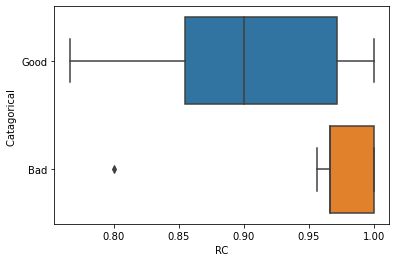

In [19]:
sns.boxplot(x='RC', y='Catagorical ', data=thp_re)

 Detecting Outliers


<AxesSubplot:xlabel='PN', ylabel='Catagorical '>

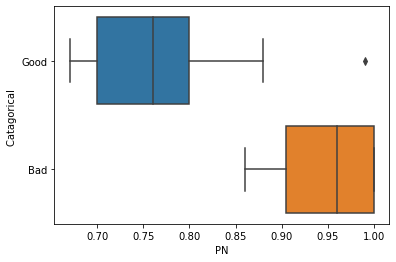

In [25]:
sns.boxplot(x='PN', y='Catagorical ', data=thp_re)

<AxesSubplot:xlabel='median', ylabel='Catagorical '>

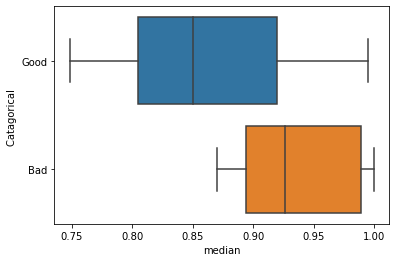

In [27]:
sns.boxplot(x='median', y='Catagorical ', data=thp_re)

<AxesSubplot:xlabel='mean', ylabel='Catagorical '>

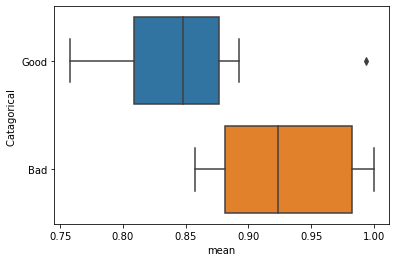

In [28]:
sns.boxplot(x='mean', y='Catagorical ', data=thp_re)

<AxesSubplot:xlabel='sum', ylabel='Catagorical '>

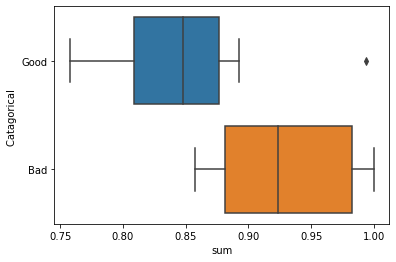

In [29]:
sns.boxplot(x='sum', y='Catagorical ', data=thp_re)

In [20]:
Q1 = thp_re.quantile(0.25)
Q3 = thp_re.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sex            1.000000
Current Age    1.000000
Parent         0.000000
PN             0.265000
DL             0.061000
SC             0.112000
RC             0.108500
H&M            0.121000
W&S            0.135000
C&EP           0.306500
LF             0.120000
median         0.143750
mean           0.113375
std            0.398665
var            0.463959
max            0.041000
min            0.173000
sum            0.113375
quantile       0.143750
dtype: float64


In [83]:
 #remove outliers & shape after remove 
thp_re= thp_re[~((thp_re < (Q1 - 1.5 * IQR)) |(thp_re > (Q3 + 1.5 * IQR))).any(axis=1)]
thp_re.shape

/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_9009/2098103500.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  thp_re= thp_re[~((thp_re < (Q1 - 1.5 * IQR)) |(thp_re > (Q3 + 1.5 * IQR))).any(axis=1)]


(16, 21)

 The variables we will use are Youth ID, sum, mean, median, min, PN,RC, sex, parent and age. 

In [137]:
#make a new dataframe
thp_corr = thp_re[['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN','RC','median', 'mean','sum','Catagorical ']]
thp_corr.head() 

,Youth ID,Sex,Current Age,Parent,PN,RC,median,mean,sum,Catagorical
0,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
1,2,1.0,19.0,0.0,0.80,0.956,0.850,0.84800,0.84800,Good
2,3,1.0,18.0,0.0,0.86,0.956,0.880,0.87525,0.87525,Bad
5,6,1.0,18.0,0.0,0.90,0.966,0.909,0.88800,0.88800,Bad
6,7,1.0,19.0,0.0,0.70,0.888,0.805,0.80925,0.80925,Good


In [138]:
thp_corr.shape


(16, 10)

In [139]:
thp_corr.dtypes

Youth ID         object
Sex             float64
Current Age     float64
Parent          float64
PN              float64
RC              float64
median          float64
mean            float64
sum             float64
Catagorical      object
dtype: object

In [140]:
thp_corr = thp_corr.rename(columns={'Catagorical ':'Class'})
thp_corr.head()
 

,Youth ID,Sex,Current Age,Parent,PN,RC,median,mean,sum,Class
0,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
1,2,1.0,19.0,0.0,0.80,0.956,0.850,0.84800,0.84800,Good
2,3,1.0,18.0,0.0,0.86,0.956,0.880,0.87525,0.87525,Bad
5,6,1.0,18.0,0.0,0.90,0.966,0.909,0.88800,0.88800,Bad
6,7,1.0,19.0,0.0,0.70,0.888,0.805,0.80925,0.80925,Good


In [141]:
n_replicas = 5

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(thp_corr.values, n_replicas, axis=0), columns=thp_corr.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated thp dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()



There are 80 observations in the inflated thp dataset.
There are 10 variables in the dataset.


,Youth ID,Sex,Current Age,Parent,PN,RC,median,mean,sum,Class
0,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
1,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
2,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
3,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good
4,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,Good


In [142]:
big_raw_data.columns

Index(['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN', 'RC', 'median',
       'mean', 'sum', 'Class'],
      dtype='object')

In [143]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Good(1)','Bad(0)']); ax.yaxis.set_ticklabels(['Good(1)','Bad(0)']) 
    plt.show() 
    
 

In [144]:
replace_values = {'Good':1,'Bad' :0}
big_raw_data= big_raw_data.replace({'Class': replace_values})

big_raw_data.head()


,Youth ID,Sex,Current Age,Parent,PN,RC,median,mean,sum,Class
0,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,1
1,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,1
2,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,1
3,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,1
4,1,1.0,18.0,0.0,0.76,0.866,0.874,0.87675,0.87675,1


In [184]:
Y=big_raw_data['Class'].to_numpy()
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [185]:
X = big_raw_data[['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN','RC','median', 'mean', 'sum' ]].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:2]

array([[-1.69376025,  0.57735027, -0.62554324,  0.        , -0.7761128 ,
        -1.09681422, -0.27108546, -0.13340455, -0.13340455],
       [-1.69376025,  0.57735027, -0.62554324,  0.        , -0.7761128 ,
        -1.09681422, -0.27108546, -0.13340455, -0.13340455]])

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)


Train set: (64, 9) (64,)
Test set: (16, 9) (16,)


In [187]:
Y_test.shape

(16,)

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [150]:
 parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [151]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


grid_search = GridSearchCV(lr,parameters,cv=10)
logreg_cv=grid_search.fit(X_train,Y_train)

 

In [152]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()

 I output the <code>GridSearchCV</code> object for logistic regression. 
 I display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.#
    

In [153]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9714285714285715


In [154]:
#Calculate the accuracy of the test data using the method score
logreg_cv.score(X_test, Y_test)


0.8125

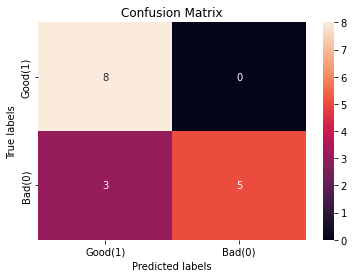

In [155]:
#look at the confusion metrix
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Logistic regression-Out of 16 applicants, 8 of them scored 1(Good,applicants who had a positive experince with the program). Out of these 8, the classifier correctly predicted 8 of them as 1(Good), and Zero of them as 0(Bad).This means that for 8 applicants, the actual Good value was 1(Good), in the test set, and the classifier also correctly predicted those as 1(Good).There were no false positives. What about the applicants that were given a Bad score of zero(applicants who were involuntarily discharged with a negative experince in the program)? Let’s look at the second row. It looks like there were 5 applicants whose Bad value was scored correctly with 0(bad).This means that for 8 applicants, the actual score was 0(bad), in the test set, and the classifier correctly predicted those as 0(bad). However the predictor incorrectly classified 3 applicants 1(Good) when they should have been scored 0(Bad).     

**********************************************************************************************************************************

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [156]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [157]:
grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(X_train, Y_train)


In [158]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}
accuracy : 1.0


In [159]:
svm_cv.score(X_test, Y_test)


1.0

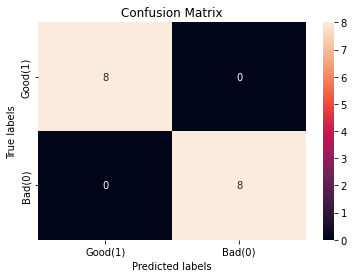

In [160]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

SVC-Out of 16 applicants, 8 of them scored 1(Good,applicants who had a positive experince with the program). Out of these 8, the classifier correctly predicted 8 of them as 1(Good), and Zero of them as 0(Bad).This means that for 8 applicants, the actual Good value was 1(Good), in the test set, and the classifier also correctly predicted those as 1(Good).There were no false positives. What about the applicants that were given a Bad score of zero(applicants who were involuntarily discharged with a negative experince in the program)? Let’s look at the second row. It looks like there were 8 applicants whose Bad value was scored correctly with 0(bad).This means that for 8 applicants, the actual score was 0(bad), in the test set, and the classifier correctly predicted those as 0(bad). There were no false negatives.    

In [161]:
big_raw_data.columns

Index(['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN', 'RC', 'median',
       'mean', 'sum', 'Class'],
      dtype='object')

In [162]:
new_input = [[24, 0, 18, 1, 3, 4, 0.65,0.75,0.65]]

In [163]:
#get perdiction from new input
new_output=svm_cv.predict(new_input)

In [164]:
#Summarize input and output  
print(new_input, new_output)

[[24, 0, 18, 1, 3, 4, 0.65, 0.75, 0.65]] [1]


With these scores (above) it would seem that this applicant will be in the program until the duration.  

In [165]:
big_raw_data.columns

Index(['Youth ID', 'Sex', 'Current Age', 'Parent', 'PN', 'RC', 'median',
       'mean', 'sum', 'Class'],
      dtype='object')

********************************************************************************************************************

 Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [166]:
 #parameters prior to change
parameters1 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()



In [167]:
#Changed parameters to test best parameters
parameters = {'criterion': ['entropy'],
     'splitter': ['random'],
     'max_depth': [16],
     'max_features': ['sqrt'],
     'min_samples_leaf': [ 4],
     'min_samples_split': [10]}

tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [168]:
#create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters
grid_search = GridSearchCV(tree, parameters1, cv=10)
tree_cv = grid_search.fit(X_train, Y_train)

In [169]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 1.0


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [170]:
tree_cv.score(X_test, Y_test)

1.0

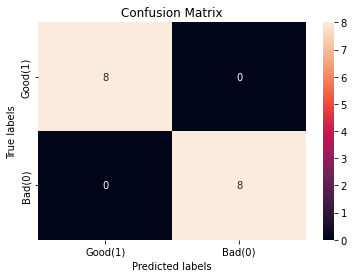

In [171]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Tree-Out of 16 applicants, 8 of them scored 1(Good,applicants who had a positive experince with the program). Out of these 8, the classifier correctly predicted 8 of them as 1(Good), and Zero of them as 0(Bad).This means that for 8 applicants, the actual Good value was 1(Good), in the test set, and the classifier also correctly predicted those as 1(Good).There were no false positives. What about the applicants that were given a Bad score of zero(applicants who were involuntarily discharged with a negative experince in the program)? Let’s look at the second row. It looks like there were 8 applicants whose Bad value was scored correctly with 0(bad).This means that for 8 applicants, the actual score was 0(bad), in the test set, and the classifier correctly predicted those as 0(bad). There were no false negatives.    

*****************************************************************************************************************



Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [172]:
#Create a k nearest neighbors object
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [173]:
#create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)

In [174]:
 print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 1.0


In [175]:
 #Calculate the accuracy of knn_cv on the test data using the method score

knn_cv.score(X_test, Y_test)

1.0

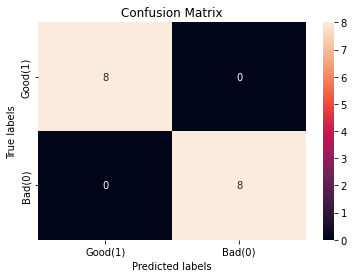

In [176]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

knn-Out of 16 applicants, 8 of them scored 1(Good,applicants who had a positive experince with the program). Out of these 8, the classifier correctly predicted 8 of them as 1(Good), and Zero of them as 0(Bad).This means that for 8 applicants, the actual Good value was 1(Good), in the test set, and the classifier also correctly predicted those as 1(Good).There were no false positives. What about the applicants that were given a Bad score of zero(applicants who were involuntarily discharged with a negative experince in the program)? Let’s look at the second row. It looks like there were 8 applicants whose Bad value was scored correctly with 0(bad).This means that for 8 applicants, the actual score was 0(bad), in the test set, and the classifier correctly predicted those as 0(bad). There were no false negatives.    

Find the method that performs the best

In [177]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print( 'Accuracy for Support Vector Machine method:', svm_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.8125
Accuracy for Support Vector Machine method: 1.0
Accuracy for Decision tree method: 1.0
Accuracy for K nearest neighbors method: 1.0


In [181]:
AccuracyScore=[0.8125,1.0,1.0,1.0]
Metric=['LogisR','SVM','DTree','KNN']
Accuracy_Metrics={'Metric':Metric,'Accuracy Score':AccuracyScore}
Metrics_df=pd.DataFrame(Accuracy_Metrics)
Metrics_df

,Metric,Accuracy Score
0,LogisR,0.8125
1,SVM,1.0000
2,DTree,1.0000
3,KNN,1.0000


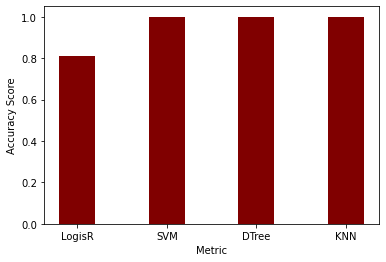

In [182]:
plt.bar(Metric,AccuracyScore, color ='maroon',width = 0.4 )
plt.xlabel("Metric")
plt.ylabel("Accuracy Score")
plt.show()